In [2]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [3]:
%%R
#This is a magic function
#%% operates on entire cell, % operates on a single line
#This allows us to work in both r and python



library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv')

barris

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_double(),
  Codi_Districte = col_double(),
  Nom_Districte = col_character(),
  Codi_Barri = col_double(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_double()
)

  warnings.warn(x, RRuntimeWarning)


# A tibble: 7,446 x 8
     Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri Sexe  Nacionalitat
   <dbl>          <dbl> <chr>              <dbl> <chr>     <chr> <chr>       
 1  2018              1 Ciutat Vella           1 el Raval  Home  Espanya     
 2  2018              1 Ciutat Vella           2 el Barri… Home  Espanya     
 3  2018              1 Ciutat Vella           3 la Barce… Home  Espanya     
 4  2018              1 Ciutat Vella           4 Sant Per… Home  Espanya     
 5  2018              2 Eixample               5 el Fort … Home  Espanya     
 6  2018              2 Eixample               6 la Sagra… Home  Espanya     
 7  2018              2 Eixample               7 la Dreta… Home  Espanya     
 8  2018              2 Eixample               8 l'Antiga… Home  Espanya     
 9  2018              2 Eixample               9 la Nova … Home  Espanya     
10  2018              2 Eixample              10 Sant Ant… Home  Espanya     
# … with 7,436 more rows, and 1 more varia

In [78]:
%%R

# Let's manually convert a few columns into factors. 
barris_2 <- barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))


# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'

barris_3 <- barris_2 %>%
                filter(Nom_Barri == 'el Poblenou') %>%

#Second, remove the nationality 'Espanya'
                filter(Nacionalitat != 'Espanya')%>%
                group_by(Nacionalitat, Sexe) %>%
                summarize(pop_sum = sum(Nombre)) %>%
                head(10)


glimpse(barris_3)
             
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#



# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

Observations: 10
Variables: 3
Groups: Nacionalitat [5]
$ Nacionalitat <fct> Itàlia, Itàlia, França, França, Regne Unit, Regne Unit, …
$ Sexe         <fct> Home, Dona, Home, Dona, Home, Dona, Home, Dona, Home, Do…
$ pop_sum      <dbl> 526, 491, 235, 244, 190, 130, 84, 131, 138, 155


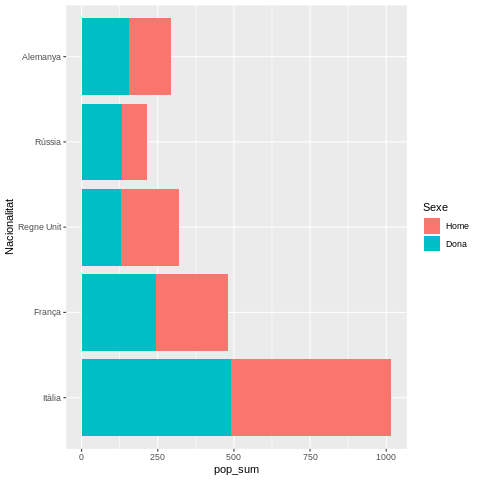

In [79]:
%%R

ggplot(barris_3, aes(x= Nacionalitat, y= pop_sum, fill= Sexe)) + geom_col() + coord_flip()

In [33]:
%%R



NULL


# Problem 3: Classes in Python

In [ ]:
# Create a class called "RandomClassifier". 



# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

In [ ]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

### What is lazy evaluation and when might you use it? (2-3 lines)